This notebook is mostly coming from [Rossmann Store Sales-Case Study](https://www.kaggle.com/juhi1994/rossmann-store-sales-case-study). It slightly modified to have a better understanding of the data.

In [1]:
import pandas as pd
import numpy as np
import os

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [4]:
for dirname, x, filenames in os.walk('./rossmann-store-sales'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('../rossmann-store-sales/train.csv')
store = pd.read_csv('../rossmann-store-sales/store.csv')
test = pd.read_csv('../rossmann-store-sales/test.csv')
sample = pd.read_csv('../rossmann-store-sales/sample_submission.csv')

/home/f/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
print(data.shape)
print(store.shape)
print(test.shape)

(1017209, 9)
(1115, 10)
(41088, 8)


In [8]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [10]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [11]:
data.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [12]:
data['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [13]:
#categorical variables:
data.describe(include='object')

,Date,StateHoliday
count,1017209,1017209
unique,942,5
top,2013-01-31,0
freq,1115,855087


In [14]:
#continuous variables
data.describe(exclude='object')

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
data.describe()[['Sales', 'Customers']].loc['mean']

Sales        5773.818972
Customers     633.145946
Name: mean, dtype: float64

In [16]:
data.describe()[['Sales', 'Customers']].loc['max']

Sales        41551.0
Customers     7388.0
Name: max, dtype: float64

In [17]:
data['Store'].nunique()

1115

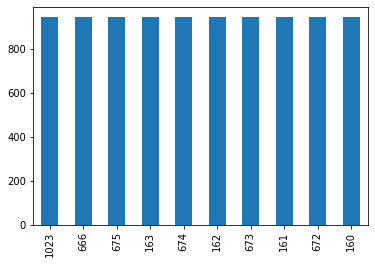

In [18]:
data['Store'].value_counts().head(10).plot.bar()


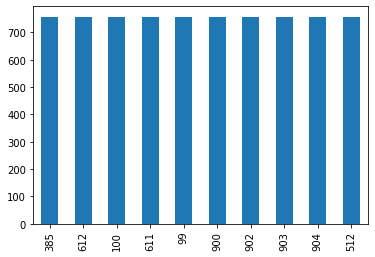

In [19]:
data.Store.value_counts().tail(10).plot.bar()

In [20]:
data['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [21]:
data['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
store_1=data[data['Store']==1]
store_1.shape

(942, 9)

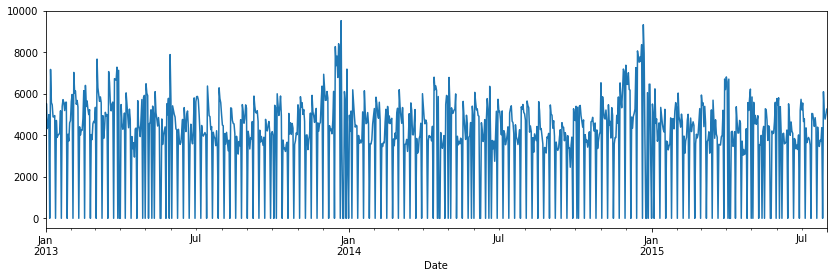

In [16]:
store_1.resample('1D', on='Date')['Sales'].sum().plot.line(figsize=(14,4))

In [25]:
store_1[store_1['Sales']==0]
#store_1[store_1['Sales']==0].shape

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
5575,1,7,2015-07-26,0,0,0,0,0,0
13380,1,7,2015-07-19,0,0,0,0,0,0
21185,1,7,2015-07-12,0,0,0,0,0,0
28990,1,7,2015-07-05,0,0,0,0,0,0
36795,1,7,2015-06-28,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
987105,1,7,2013-01-27,0,0,0,0,0,0
994910,1,7,2013-01-20,0,0,0,0,0,0
1002715,1,7,2013-01-13,0,0,0,0,0,0
1010520,1,7,2013-01-06,0,0,0,0,0,1


In [26]:
data['Date'].unique().shape

(942,)

In [27]:
#HANDLING TEST SET:
test.head() 
#test.shape


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [28]:
test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')
store_1test = test[test['Store']==1]
store_1test['Date'].min(), store_1test['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [29]:
store_1test['Open'].value_counts()

1.0    41
0.0     7
Name: Open, dtype: int64

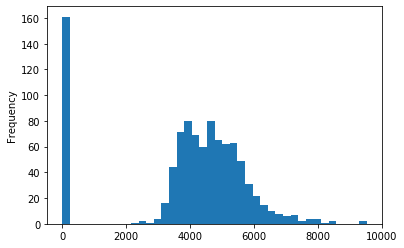

In [30]:
store_1['Sales'].plot.hist(bins=40)

In [31]:
store_1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


In [32]:
store_1store = store[store['Store']==1]
store_1store.T

,0
Store,1
StoreType,c
Assortment,a
CompetitionDistance,1270
CompetitionOpenSinceMonth,9
CompetitionOpenSinceYear,2008
Promo2,0
Promo2SinceWeek,NaN
Promo2SinceYear,NaN
PromoInterval,NaN


In [33]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [34]:
#tilde is for negation..
#return me a first row on Store that, Promo2SinceYear is not null..
store[~store['Promo2SinceYear'].isna()].iloc[0]

Store                                      2
StoreType                                  a
Assortment                                 a
CompetitionDistance                      570
CompetitionOpenSinceMonth                 11
CompetitionOpenSinceYear                2007
Promo2                                     1
Promo2SinceWeek                           13
Promo2SinceYear                         2010
PromoInterval                Jan,Apr,Jul,Oct
Name: 1, dtype: object

In [35]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [36]:
#filling missing values:
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(store['Promo2SinceYear'].mode().iloc[0])
store['PromoInterval'] = store['PromoInterval'].fillna(store['PromoInterval'].mode().iloc[0])
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(store['CompetitionDistance'].max())
store['CompetitionOpenSinceMonth']=store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].mode().iloc[0])
store['CompetitionOpenSinceYear']=store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].mode().iloc[0])
store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [37]:
store['Promo2SinceYear'].mode().iloc[0]

2011.0

In [38]:
data_merged = data.merge(store, on='Store', how='left')

In [39]:
data_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"


In [40]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [41]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"


In [42]:
print(data.shape)
print(store.shape)
print(data_merged.shape)

(1017209, 9)
(1115, 10)
(1017209, 18)


In [43]:
data_merged.isna().sum()#.sum() #cross checking if there are any missing values

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [44]:
#Encoding
#3 categorical column -- StateHoliday,StoreType,Assortment,PromoInterval
#1 date column
#rest are numerical
data_merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [45]:
data_merged['day']=data_merged['Date'].dt.day
data_merged['month']=data_merged['Date'].dt.month
data_merged['year']=data_merged['Date'].dt.year
data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,1880.0,4.0,2006.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,9260.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,870.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct",1,1,2013


In [46]:
data_merged.isnull().sum().sum()

0

In [47]:
data_merged['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [48]:
#checking for all categorical columns one by one
data_merged['StateHoliday'].unique()
data_merged['StateHoliday']=data_merged['StateHoliday'].map({'0':0,0:0,'a':1,'b':2,'c':3})
data_merged['StateHoliday']=data_merged['StateHoliday'].astype(float).astype(int)


In [49]:
data_merged['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [50]:
data_merged['Assortment']=data_merged['Assortment'].map({'a':1, 'b':2, 'c':3})
data_merged['Assortment']=data_merged['Assortment'].astype(int)

In [51]:
data_merged['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [52]:
data_merged['StoreType']=data_merged['StoreType'].map({'a':1, 'b':2, 'c':3, 'd':4})
data_merged['StoreType']=data_merged['StoreType'].astype(int)

In [53]:
data_merged['PromoInterval'].unique()

array(['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [54]:
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
data_merged['PromoInterval']=data_merged['PromoInterval'].map(map_promo)

In [55]:
data_merged.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                         int64
day                                   int64
month                                 int64
year                                  int64
dtype: object

In [56]:
data_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,5,2015-07-31,5263,555,1,1,0,1,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,1,...,570.0,11.0,2007.0,1,13.0,2010.0,1,31,7,2015
2,3,5,2015-07-31,8314,821,1,1,0,1,1,...,14130.0,12.0,2006.0,1,14.0,2011.0,1,31,7,2015
3,4,5,2015-07-31,13995,1498,1,1,0,1,3,...,620.0,9.0,2009.0,0,0.0,2011.0,1,31,7,2015
4,5,5,2015-07-31,4822,559,1,1,0,1,1,...,29910.0,4.0,2015.0,0,0.0,2011.0,1,31,7,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,1,...,1900.0,6.0,2014.0,1,31.0,2013.0,1,1,1,2013
1017205,1112,2,2013-01-01,0,0,0,0,1,1,3,...,1880.0,4.0,2006.0,0,0.0,2011.0,1,1,1,2013
1017206,1113,2,2013-01-01,0,0,0,0,1,1,1,...,9260.0,9.0,2013.0,0,0.0,2011.0,1,1,1,2013
1017207,1114,2,2013-01-01,0,0,0,0,1,1,1,...,870.0,9.0,2013.0,0,0.0,2011.0,1,1,1,2013


In [57]:
# Train and validate Split
features= data_merged.columns.drop(['Sales','Date'])
features

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'day', 'month',
       'year'],
      dtype='object')

In [58]:
from sklearn.model_selection import train_test_split
train_x, validate_x, train_y, validate_y = train_test_split(data_merged[features], np.log(data_merged['Sales']+1), test_size=0.2, random_state=1)
train_x.shape, validate_x.shape, train_y.shape, validate_y.shape

((813767, 19), (203442, 19), (813767,), (203442,))

In [59]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(max_depth=10, random_state=1).fit(train_x, train_y)
validate_y_pred=model_dt.predict(validate_x)

In [95]:
# def draw_tree(model, columns):
#     import pydotplus
#     from sklearn.externals.six import StringIO
#     from IPython.display import Image
#     import os
#     from sklearn import tree
    
#     graphviz_path = '/mnt/c/Program Files (x86)/Graphviz2.38/bin/'
#     os.environ["PATH"] += os.pathsep + graphviz_path
     
#     dot_data = StringIO()
#     tree.export_graphviz(model,
#                          out_file=dot_data,
#                          feature_names=columns)
#     graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#     return Image(graph.create_png())

In [ ]:
#!python -m pip install pydotplus 

In [71]:
# draw_tree(model_dt,features)

/home/f/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


InvocationException: GraphViz's executables not found

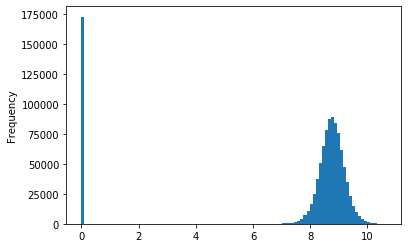

In [99]:
pd.Series(np.log(data_merged['Sales']+1)).plot.hist(bins=100)

In [73]:
validate_y_pred = model_dt.predict(validate_x)
from sklearn.metrics import mean_squared_error
validate_y_inv=np.exp(validate_y)-1 #becaused we added +1 while log transformation
validate_y_pred_inv=np.exp(validate_y_pred)-1
np.sqrt(mean_squared_error(validate_y_inv,validate_y_pred_inv))

1006.5490412542867

In [74]:
model_dt.feature_importances_

array([4.51763902e-05, 4.05703519e-05, 9.98092769e-01, 0.00000000e+00,
       5.12216022e-04, 0.00000000e+00, 0.00000000e+00, 7.45835222e-04,
       7.66171029e-05, 3.07044136e-04, 1.76818366e-05, 1.90128833e-05,
       1.37081406e-05, 9.23299222e-05, 3.50122943e-05, 1.03366174e-06,
       0.00000000e+00, 9.90715336e-07, 2.39501380e-09])

Store                        4.517639e-05
DayOfWeek                    4.057035e-05
Customers                    9.980928e-01
Open                         0.000000e+00
Promo                        5.122160e-04
StateHoliday                 0.000000e+00
SchoolHoliday                0.000000e+00
StoreType                    7.458352e-04
Assortment                   7.661710e-05
CompetitionDistance          3.070441e-04
CompetitionOpenSinceMonth    1.768184e-05
CompetitionOpenSinceYear     1.901288e-05
Promo2                       1.370814e-05
Promo2SinceWeek              9.232992e-05
Promo2SinceYear              3.501229e-05
PromoInterval                1.033662e-06
day                          0.000000e+00
month                        9.907153e-07
year                         2.395014e-09
dtype: float64

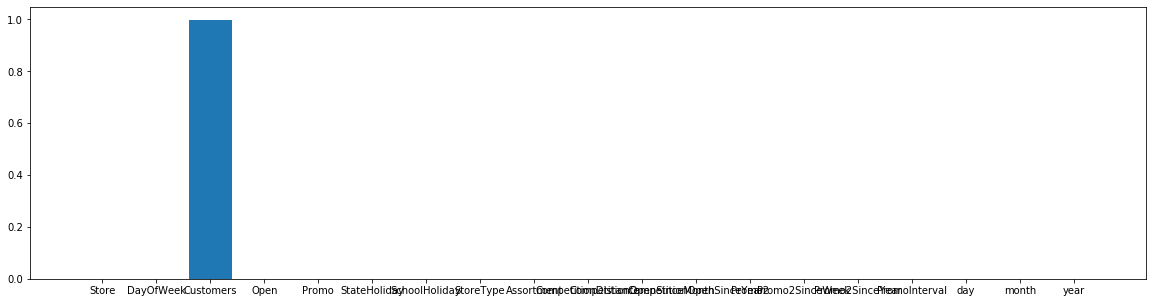

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.bar(features,model_dt.feature_importances_)
pd.Series(model_dt.feature_importances_,index=features)

In [76]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':list(range(5,20))}
base_model=DecisionTreeRegressor()
cv_model=GridSearchCV(base_model,param_grid=parameters,cv=5,return_train_score=True).fit(train_x,train_y)
parameters
#by default cv=2

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [77]:
cv_model.best_params_

{'max_depth': 19}

In [78]:
pd.DataFrame(cv_model.cv_results_).sort_values(by='mean_test_score',ascending=False) #[['param_max_depth','mean_test_score']]
#differnt types tried with different max depth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,5.572336,0.156322,0.064057,0.001661,19,{'max_depth': 19},0.999372,0.999382,0.999379,0.999376,...,0.999376,0.000004,1,0.999658,0.999673,0.999668,0.999661,0.999677,0.999668,0.000007
13,5.197547,0.098645,0.054637,0.000652,18,{'max_depth': 18},0.999330,0.999343,0.999338,0.999326,...,0.999334,0.000006,2,0.999562,0.999581,0.999576,0.999568,0.999584,0.999574,0.000008
12,5.519846,0.462158,0.052128,0.002333,17,{'max_depth': 17},0.999270,0.999286,0.999289,0.999276,...,0.999278,0.000008,3,0.999451,0.999472,0.999469,0.999462,0.999476,0.999466,0.000008
11,4.889114,0.107476,0.046412,0.001205,16,{'max_depth': 16},0.999184,0.999198,0.999207,0.999188,...,0.999192,0.000009,4,0.999324,0.999345,0.999345,0.999340,0.999349,0.999341,0.000009
10,4.862675,0.158899,0.048015,0.006198,15,{'max_depth': 15},0.999076,0.999090,0.999107,0.999083,...,0.999088,0.000011,5,0.999187,0.999204,0.999207,0.999199,0.999208,0.999201,0.000008
9,4.857804,0.256222,0.042664,0.003071,14,{'max_depth': 14},0.998951,0.998964,0.998982,0.998950,...,0.998962,0.000012,6,0.999036,0.999049,0.999050,0.999042,0.999048,0.999045,0.000005
8,4.357445,0.125875,0.037496,0.001025,13,{'max_depth': 13},0.998819,0.998818,0.998838,0.998810,...,0.998819,0.000010,7,0.998874,0.998878,0.998883,0.998881,0.998880,0.998879,0.000003
7,4.049401,0.072465,0.031808,0.001176,12,{'max_depth': 12},0.998658,0.998647,0.998675,0.998643,...,0.998655,0.000011,8,0.998692,0.998696,0.998701,0.998697,0.998702,0.998697,0.000004
6,3.823459,0.052094,0.029965,0.001017,11,{'max_depth': 11},0.998493,0.998486,0.998487,0.998478,...,0.998486,0.000005,9,0.998513,0.998520,0.998512,0.998524,0.998523,0.998518,0.000005
5,3.702434,0.147803,0.029191,0.001063,10,{'max_depth': 10},0.998319,0.998318,0.998313,0.998302,...,0.998314,0.000006,10,0.998331,0.998341,0.998335,0.998341,0.998340,0.998338,0.000004


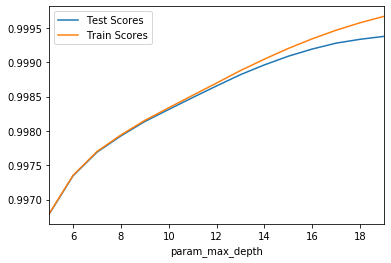

In [79]:
df_cv_results=pd.DataFrame(cv_model.cv_results_).sort_values(by='mean_test_score',ascending=False)
import matplotlib.pyplot as plt
df_cv_results.set_index('param_max_depth')['mean_test_score'].plot.line()
df_cv_results.set_index('param_max_depth')['mean_train_score'].plot.line()
plt.legend(['Test Scores','Train Scores'])

In [80]:
stores_avg_cust = data.groupby(['Store'])[['Customers']].mean().reset_index().astype(int)
test_1 = test.merge(stores_avg_cust,on='Store',how='left')
test.shape,test_1.shape
test_merged = test_1.merge(store,on='Store',how='inner')
test_merged['Open']=test_merged['Open'].fillna(1)
test_merged['Date']=pd.to_datetime(test_merged["Date"],format='%Y-%m-%d')
test_merged['day']=test_merged['Date'].dt.day
test_merged['month']=test_merged['Date'].dt.month
test_merged['year']=test_merged['Date'].dt.year
test_merged['StateHoliday']=test_merged['StateHoliday'].map({'0':0,'a':1})
test_merged['StateHoliday']=test_merged['StateHoliday'].astype(int)
test_merged['Assortment']=test_merged['Assortment'].map({'a':1,'b':2,'c':3})
test_merged['Assortment']=test_merged['Assortment'].astype(int)
test_merged['StoreType']=test_merged['StoreType'].map({'a':1,'b':2,'c':3,'d':4})
test_merged['StoreType']=test_merged['StoreType'].astype(int)
map_promo = {'Jan,Apr,Jul,Oct':1,'Feb,May,Aug,Nov':2,'Mar,Jun,Sept,Dec':3}
test_merged['PromoInterval']=test_merged['PromoInterval'].map(map_promo)

In [90]:
test_merged

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Customers,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,day,month,year
0,1,1,4,2015-09-17,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,17,9,2015
1,857,1,3,2015-09-16,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,16,9,2015
2,1713,1,2,2015-09-15,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,15,9,2015
3,2569,1,1,2015-09-14,1.0,1,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,14,9,2015
4,3425,1,7,2015-09-13,0.0,0,0,0,467,3,...,1270.0,9.0,2008.0,0,0.0,2011.0,1,13,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,37664,1115,3,2015-08-05,1.0,1,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,5,8,2015
41084,38520,1115,2,2015-08-04,1.0,1,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,4,8,2015
41085,39376,1115,1,2015-08-03,1.0,1,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,3,8,2015
41086,40232,1115,7,2015-08-02,0.0,0,0,1,358,4,...,5350.0,9.0,2013.0,1,22.0,2012.0,3,2,8,2015


In [91]:
test_pred=model_dt.predict(test_merged[features])
test_pred_inv=np.exp(test_pred)-1

In [92]:
submission_predicted=pd.DataFrame({'Id':test['Id'],'Sales':test_pred_inv})

In [93]:
submission_predicted.to_csv('submission.csv',index=False)
submission_predicted.head()

,Id,Sales
0,1,4451.997192
1,2,4451.997192
2,3,4451.997192
3,4,4451.997192
4,5,3933.626011


In [94]:
#to calculate RMSPE(Root Mean Square Percentage Error)
def ToWeight(y):
    w = np.zeros(y.shape, dtype=float)
    ind = y != 0
    w[ind] = 1./(y[ind]**2)
    return w

def rmspe(y, yhat):
    w = ToWeight(y)
    rmspe = np.sqrt(np.mean( w * (y - yhat)**2 ))
    return rmspe

validate_y_inv=np.exp(validate_y)-1 #becaused we added +1 while log transformation
validate_y_pred_inv=np.exp(validate_y_pred)-1
rmse_val=np.sqrt(mean_squared_error(validate_y_inv,validate_y_pred_inv))
rmspe_val=rmspe(validate_y_inv,validate_y_pred_inv)
print(rmse_val,rmspe_val)

1006.5490412542867 0.1414016270586752


In [104]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [105]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,a,a,29910.0,4.0,2015.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,2011.0,"Jan,Apr,Jul,Oct"


In [103]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [107]:
sample

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
